In [1]:
def dp (capacity,item,weight,value,record):
    if record[capacity][item] != -1:
        return record[capacity][item]
    pick, unpick = 0,0
    if capacity>=weight[item]:
        pick = dp (capacity-weight[item],item-1,weight,value,record)
        pick += value[item]
    unpick = dp (capacity, item-1,weight,value,record)
    #print(capacity,item,pick,unpick)
    if pick>unpick:
        record[capacity][item] = pick 
        #backtrack[capacity][item] = 2
    else:
        record[capacity][item] = unpick
        #backtrack[capacity][item] = 1
    
    return record[capacity][item]

In [2]:
def back_track(capacity,item):
    ans = []
    while (backtrack[capacity][item]>0):        
        if backtrack[capacity][item] == 2:
            ans.append(item)
            capacity -= W[item]
        item -= 1
        #print(capacity,item)
        if capacity<0 or item<0:
            break
    return list(reversed(ans))
        
    

In [3]:
from random import randrange
import time

In [4]:
class BinomialTree:
    def __init__(self, key, value, sum = 0, value_sum = 0, read_key_or_sum = 0,order = 0):
        self.key = key
        self.value = value
        self.sum = key
        if sum != 0:
            self.sum = sum
        self.value_sum = value
        if value_sum != 0:
            self.value_sum = value_sum
        self.read_key_or_sum = read_key_or_sum
        self.children = []
        self.order = order
    def print_tree(self,low,high,d):
        #print("key:%i,%i,root:%i,value_sum:%i,read:%i"%(self.key,self.sum,self.order,self.value_sum,self.read_key_or_sum))
        if self.read_key_or_sum:
            '''
            if self.sum<high:
                print("sum:%i,value:%i"%(self.sum,self.value_sum))                
                if self.sum in d.keys():                  
                    d[self.sum] += [self.value_sum]
                else:
                    d.setdefault(self.sum,[self.value_sum])
            '''
            return
        else:
            #print("key:%i,%i,root:%i,children:%i"%(self.key,self.sum,self.order,len(self.children)))
            #print("key:%i,value:%i"%(self.key,self.value))                
            if self.key in d.keys():                  
                d[self.key] += [self.value]
            else:
                d.setdefault(self.key,[self.value])
            for child in self.children:
                #print("child key:%i,%i,root:%i,children:%i"%(child.key,child.sum,child.order,len(child.children)))
                #print(child.children[0],child)
                child.print_tree(low,high,d)
    def find_tree_to_merge(self,merge_heap):
        if self.read_key_or_sum == 1:
            return
        if self.sum>=merge_heap.low and self.sum<merge_heap.high:
            self.read_key_or_sum = 1
            #print("merge tree:%i"%self.sum)
            #tmp_tree = BinomialTree(self.key,self.value,self.sum,self.value_sum,self.read_key_or_sum,self.order)
            tmp_tree = BinomialTree(self.sum,self.value_sum)
            #tmp_tree.children = self.children
            #tmp_tree.read_key_or_sum = 1
            merge_heap.trees.append(tmp_tree)
            return
        else:
            for child in self.children:
                if child.sum>=merge_heap.low and child.sum<merge_heap.high:
                    child.read_key_or_sum = 1
                    #print("merge child:%i"%child.sum)
                    #tmp_tree = BinomialTree(child.key,child.value,child.sum,child.value_sum,child.read_key_or_sum,child.order)
                    tmp_tree = BinomialTree(child.sum,child.value_sum)
                    #tmp_tree.children = child.children
                    #tmp_tree.read_key_or_sum = 1
                    merge_heap.trees.append(tmp_tree)
                elif child.read_key_or_sum==0:
                    child.find_tree_to_merge(merge_heap)
    def add_at_end(self, t):
        self.children.append(t)
        self.sum += t.sum
        self.value_sum += t.value_sum
        self.order = self.order + 1

In [5]:
class BinomialHeap:
    def __init__(self,low,high):
        self.trees = []
        self.low = low
        self.high = high
        self.dict = ()
 
    def extract_max(self):
        if self.trees == []:
            return None
        largest_node = self.trees[0]
        for tree in self.trees:
            if tree.key > largest_node.key:
                largest_node = tree
        self.trees.remove(largest_node)
        h = BinomialHeap(self.low,self.high)
        h.trees = largest_node.children
        self.merge(h)
 
        return largest_node.key
 
    def get_max(self):
        if self.trees == []:
            return None
        mx = self.trees[0].key
        for tree in self.trees:
            if tree.key > mx:
                mx = tree.key
        return mx

    def find_trees_to_merge(self,t_next):       
        if self.trees == []:
            return None
        tmp_heap = BinomialHeap(t_next.low,t_next.high)
        for tree in self.trees:
            tree.find_tree_to_merge(tmp_heap)
        t_next.merge(tmp_heap)
                        
    def print_heap(self):
        self.d = dict()
        if self.trees == []:
            print("Empty!")
            return
        for tree in self.trees:
            tree.print_tree(self.low,self.high,self.d)
    
        
    def combine_roots(self, h):
        self.trees.extend(h.trees)
        self.trees.sort(key=lambda tree: tree.order)
 
    def merge(self, h):
        self.combine_roots(h)
        if self.trees == []:
            return
        i = 0
        while i < len(self.trees) - 1:
            current = self.trees[i]
            after = self.trees[i + 1]
            if current.order == after.order:
                if (i + 1 < len(self.trees) - 1
                    and self.trees[i + 2].order == after.order):
                    after_after = self.trees[i + 2]
                    if after.key > after_after.key:
                        after.add_at_end(after_after)
                        del self.trees[i + 2]
                    else:
                        after_after.add_at_end(after)
                        del self.trees[i + 1]
                else:
                    if current.key > after.key:
                        current.add_at_end(after)
                        del self.trees[i + 1]
                    else:
                        after.add_at_end(current)
                        del self.trees[i]
            i = i + 1
 
    def insert(self, key,value):
        g = BinomialHeap(self.low,self.high)
        g.trees.append(BinomialTree(key,value))
        self.merge(g)

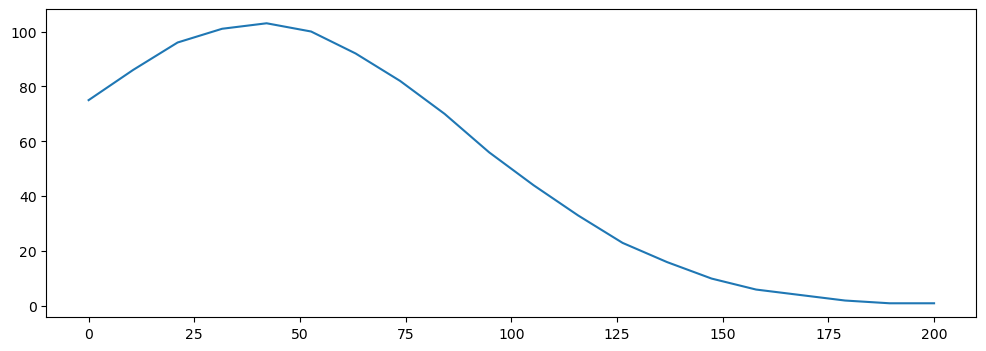

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
SKEW_PARAMS = [0]

def skew_norm_pdf(x,e=0,w=1,a=0):
    # adapated from:
    # http://stackoverflow.com/questions/5884768/skew-normal-distribution-in-scipy
    t = (x-e) / w
    return 2.0 * w * norm.pdf(t) * norm.cdf(a*t)

# generate the skew normal PDF for reference:
location = 40.0
scale = 50.0
x = np.linspace(0,200,20) 
num = [50]*20
plt.subplots(figsize=(12,4))
#plt.plot(x,num)
#plt.show()
for alpha_skew in SKEW_PARAMS:
    p = skew_norm_pdf(x,location,scale,alpha_skew)
    k = np.around(p/sum(p)*1000)
    # n.b. note that alpha is a parameter that controls skew, but the 'skewness'
    # as measured will be different. see the wikipedia page:
    # https://en.wikipedia.org/wiki/Skew_normal_distribution
    plt.plot(x,k)
    plt.show()
    num = k



In [7]:
#num = 50
num = np.array(num).astype(int)
interval = 20
base = 10
C = 15000
W = [-1]
W_1 = [-1]
w = dict()
h = dict()
for j in range (interval):
    low = j*base
    high = (j+1)*base
    h.setdefault(low,BinomialHeap(low,high))
for j in range (interval):    
    low = j*base
    high = (j+1)*base
    #print("%i,%i:"%(low,high))
    w.setdefault(low, {'w':[randrange(max(1,low),high) for i in range (num[j])],\
                       'v':[randrange(1,50) for i in range (num[j])]})
    #print('w:',w[low]['w'])
    #print('v:',w[low]['v'])
    for a,b in zip(w[low]['w'],w[low]['v']):
        h[low].insert(a,b)

In [8]:
for j in range(interval):
    #print(j)
    low = j*base
    h[low].print_heap()
    for k in range(interval-1,j,-1):
        h[low].find_trees_to_merge(h[k*base])
    #print("Max1:%i"%h[low].get_max())
    h[low].print_heap()
    #for key,value in h[low].d.items():
    #    print("(%i,"%key,value,")",end='')
    #print()

In [9]:
W = [-1]
W_1 = [-1]
W_2 = [-1]
V = [-1]
V_1 = [-1]
for j in range (interval):
    W += w[j*base]['w']
    heap = h[j*base].d
    for k,vs in heap.items():
        W_1 += [k]*len(vs)
        W_2 += [j*base+base//2]*len(vs)
        V_1 += vs
    #W_2 += [j*base+base//2 for i in range (num)]
    V += w[j*base]['v']
assert(len(W_1)==len(V_1))
record = [[-1]*(sum(num)+1) for i in range(C+1)]
record_1 = [[-1]*(len(W_1)) for i in range(C+1)]
record_2 = [[-1]*(len(W_1)) for i in range(C+1)]
backtrack = [[-1]*(sum(num)+1) for i in range(C+1)]
for i in range(C+1):
    record[i][0] = 0
    record_1[i][0] = 0
    record_2[i][0] = 0
for i in range(sum(num)+1):
    record[0][i] = 0
for i in range(len(W_1)):
    record_1[0][i] = 0
    record_2[0][i] = 0
#for w,v in zip (W[1:],W_1[1:]):
#    print("(%02i, %02i) "%(w,v),end="")

In [10]:
data_num_original = sum(num)
data_num_compressed = len(W_1)-1
print("Num of data before compression:%i,after compression:%i"%(data_num_original,data_num_compressed))
print("Compression rate: %.03f"%((data_num_original-data_num_compressed)/data_num_original*100),"%")
#print(sum(V[1:]),sum(V_1[1:]))
assert(sum(V[1:])==sum(V_1[1:]))
#print(W_1,W_2)
now = time.time()
ans1= dp (C,sum(num),W,V,record)
print("Maximum profit found with original data:",ans1)
print("Elapsed time: %.03f"%(time.time()-now),"sec.")
print()
now = time.time()
ans2 = dp (C,len(W_1)-1,W_1,V_1,record_1)
print("Maximum profit found with compressed data:",ans2)
print("Deviation:%.03f"%((ans2-ans1)/ans1*100),"%")
print("Elapsed time:  %.03f"%(time.time()-now),"sec.")
now = time.time()
ans3 = dp (C,len(W_2)-1,W_2,V_1,record_2)
print()
print("Maximum profit found with compressed data and quantization:",ans3)
print("Deviation:%.03f"%((ans3-ans1)/ans1*100),"%")
print("Elapsed time: %.03f"%(time.time()-now),"sec.")
#print(back_track(C,num*interval))
#for i in backtrack:
#    print(i)

Num of data before compression:1001,after compression:587
Compression rate: 41.359 %
Maximum profit found with original data: 15284
Elapsed time: 32.004 sec.

Maximum profit found with compressed data: 14560
Deviation:-4.737 %
Elapsed time:  10.200 sec.

Maximum profit found with compressed data and quantization: 14570
Deviation:-4.672 %
Elapsed time: 2.560 sec.
